<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [53]:
# librerias

import os
import numpy as np
import pandas as pd
import seaborn as sns #agregada para hacer los ultimos graficos

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [54]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [55]:
data["species"] = data["species"].str.lower().str.replace(" ","").fillna("default") #Se solucionan los problemas de escritura de especies
data["species"].count() #se cuentan los elementos

150

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

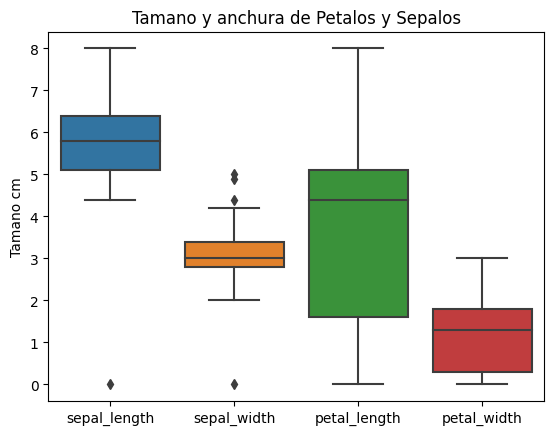

In [56]:
for col in data.columns[:4]: #se rellenan con 0.0 los valoren NaN en las columnas necesarias
    data[col] = data[col].fillna(0.0)

sns.boxplot(data=data) #Se realiza el grafco pedido
plt.title("Tamano y anchura de Petalos y Sepalos")
plt.ylabel("Tamano cm")
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [57]:
#Se crea un diccionario para los rangos de tamano correspondiente
dicc={
    'sepal_length' : [4.0, 7.0] ,
    'sepal_width' : [2.0, 4.5] ,
    'petal_length': [1.0, 7.0] ,
    'petal_width': [0.1, 2.5]
}

label = []

#se registra si cumplen las condiciones
for item in range(len(data)):
  flag = True
  for cualidad in data.columns[:4]:
    if (data[cualidad][item]<dicc[cualidad][0] or data[cualidad][item]>dicc[cualidad][1]):
      flag = False
  label.append(flag)

data["label"] = label
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

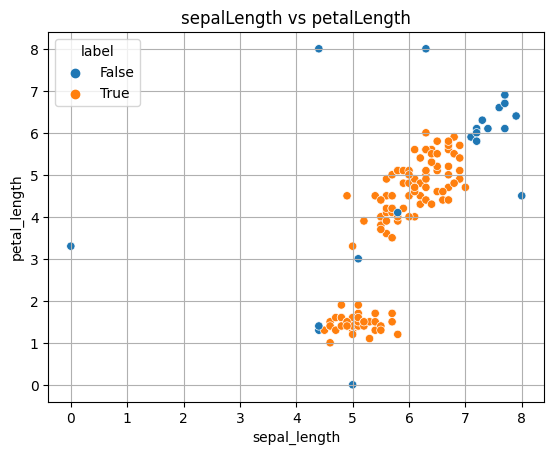

In [58]:
#primer grafico pedido
sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue='label',
    data=data,
)
plt.grid()
plt.title('sepalLength vs petalLength')
plt.show()

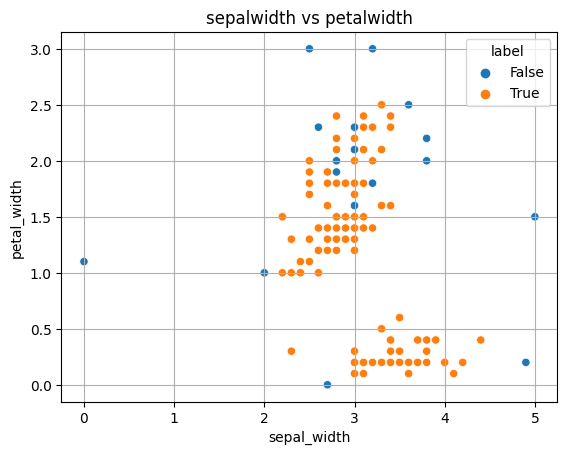

In [50]:
#Segundo grafico pedido
sns.scatterplot(
    x='sepal_width',
    y='petal_width',
    hue='label',
    data=data,
)
plt.grid()
plt.title('sepalwidth vs petalwidth')
plt.show()

**Conclusión:** Existe una notoria tendencia de las flores que cumplen las condiciones impuestas, pero aún así existen muestras que alteran la vision del gráfico debido a que escapan de lo esperable (Notar que dado que los datos NaN fueron reemplazados por 0.0, es esperable de que estos datos no sigan la norma)

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

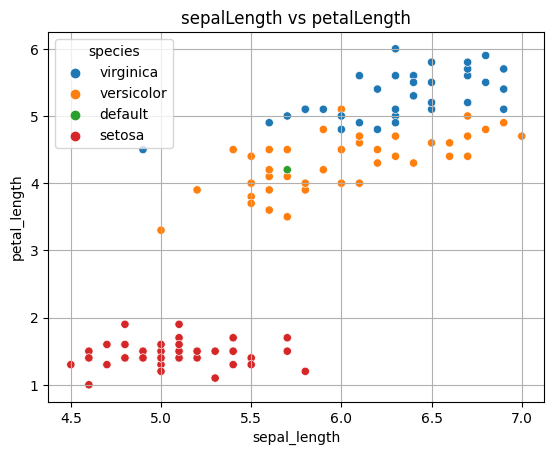

In [60]:
new_data = data[data['label'] == True] #Se separan los datos que cumplian las condiciones

plt.grid()
#Se realiza el grafico pedido
sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue='species',
    data=new_data,
)

plt.title('sepalLength vs petalLength')
plt.show()